## Timing our algorithms

In [31]:
from search_naive_timing import naive_matching
from read_fasta import read_fasta_file
from read_fastq import read_fastq_file
import time, random
import pandas as pd
import seaborn as sns

In [9]:
def dna(length=int(), letters="CGTA"):
    return''.join(random.choices(letters, k=length))

def create_fasta(start, stop, step):
    name = f"n_{stop}.fasta"
    f = open(name, "w")
    counter = 1

    for i in range(start, stop, step):
        f.write('>Seq' + str(counter) + '\n' + dna(i) + '\n')
        counter += 1
    f.close()

    return name

def create_fastq(m):
    name = f"m_{m}.fastq"
    f = open(name, "w")
    f.write(
        '@' + 'Seq' + str(1) + '\n' + 
        dna(m) + '\n' + 
        '+' + '\n' + 
        '~' * m + '\n')
    f.close()
    
    return name

In [28]:
def time_algo(n, m, step):
    df = pd.DataFrame(range(20, n, step), columns=['n'])
    fastq = create_fastq(m)
    fasta = create_fasta(20, n, step)

    fastq_dict = read_fastq_file(fastq)
    fasta_dict = read_fasta_file(fasta)
    times = []


    for item in fastq_dict.items():
        for seq in fasta_dict.items():
            start = time.time()
            naive_matching(seq, item)
            end = time.time()
            difference = end - start
            times.append(difference)
    
    df['Time'] = times

    return df


In [65]:
df_10 = time_algo(1000000, 10, 100000)
df_10000 = time_algo(1000000, 10000, 100000)
df_50000 = time_algo(1000000, 50000, 100000)
df_100000 = time_algo(1000000, 100000, 100000)
df_200000 = time_algo(1000000, 200000, 100000)
df_900000 = time_algo(1000000, 900000, 100000)

Seq1 0 Seq2 74470 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq3 125866 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq4 158873 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq5 11093 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq5 248187 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq8 149207 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq8 183602 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq9 107576 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~
Seq1 0 Seq10 760393 0 10M * 0 0 CGGGTAGGAA ~~~~~~~~~~


In [63]:
concat = pd.concat([
    df_10.assign(dataset='m = 10'),
    df_10000.assign(dataset='m = 10000'), 
    df_50000.assign(dataset='m = 50000'), 
    df_100000.assign(dataset='m = 100000'), 
    df_200000.assign(dataset='m = 200000'), 
    df_900000.assign(dataset='m = 900000')
    ], ignore_index = True)

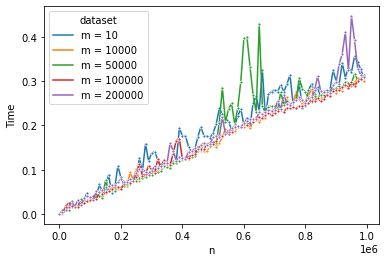

In [64]:
h = sns.lineplot(x = 'n', y = 'Time', 
                    hue = 'dataset', marker = '.',
                    data = concat)
# h.figure.savefig('naive_search.pdf')